Data Exploration and Analysis

This homework will take you through the data exploration process on the dataset that you had cleaned up in the previous homework. You will be using graphs to visualize the data, then move on to some mathemetical descriptions of the data, and then come up with some hypotheses to explain your findings.

## Defining the Question

Think about the questions you would ask yourself just by looking at the previous data. In this homework we'll be exploring mainly two questions. At the end you choose a question of your own to explore!
1. How are the donations distributed? This is a overaching question that will mainly be answering many sub-questions
    1. Is there an overall increase or decrease in donations?
    2. Is there a pattern? Is the pattern weekly or monthly?
    3. Are there any spikes? If yes, can you hypothesize why?
2. In how much time will the Dam target of be reached (This will be done in part b of the homework)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = './'
data = pd.read_pickle(path+'individual_contributions.pkl')

data.head()

,Bank,Name,Amount,Date
0,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,25.0,2018-09-10
1,AL BARAKA BANK (PAKISTAN) LTD,SARFARAZ 0117,100.0,2018-09-10
2,AL BARAKA BANK (PAKISTAN) LTD,HAMNA ZEESHAN 0117,100.0,2018-09-10
3,AL BARAKA BANK (PAKISTAN) LTD,ADC 0117,200.0,2018-09-10
4,AL BARAKA BANK (PAKISTAN) LTD,NOMAN 0117,200.0,2018-09-10


## Part A: Finding distribution, historical trends and correlations

### Subpart 1: Distribution of the data (15 marks)

#### Plotting individual contributions
Below this cell make plots that give you an initial view of how the amounts are distribution i.e. how much money each person usually pays. Go through the [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html) to find out more. Also have a look at the [example gallery](https://seaborn.pydata.org/examples/index.html) to know what each visualization gives you.

(736885.0, 736975.0)

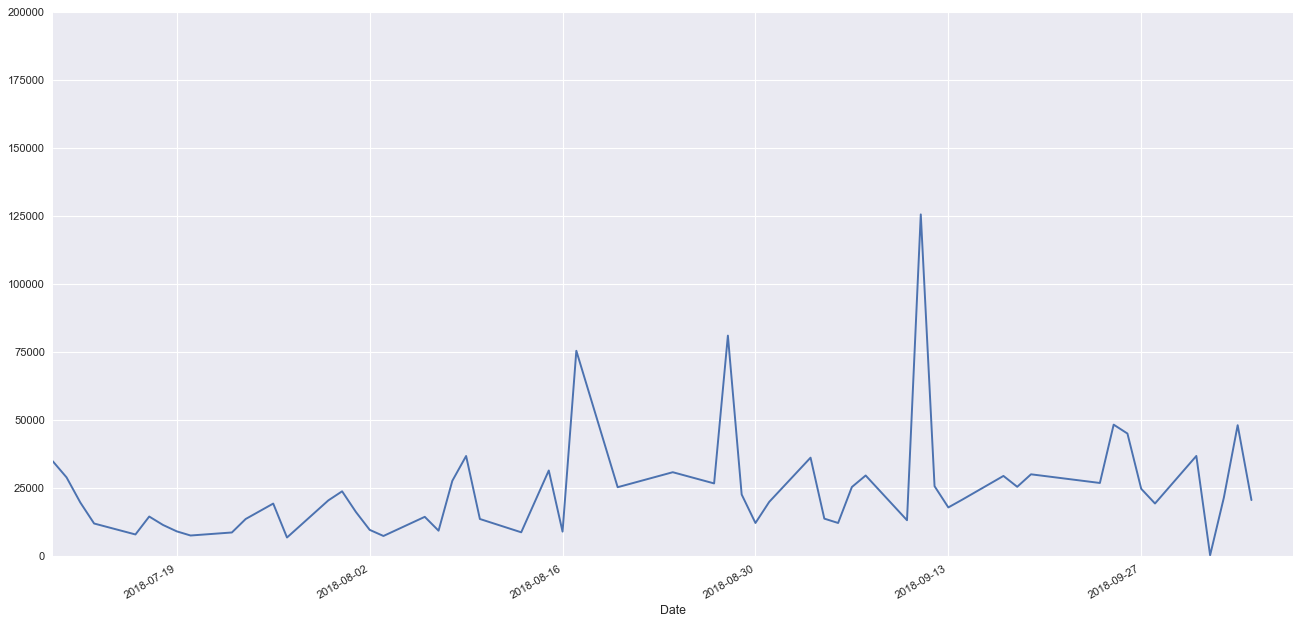

In [30]:
## Write code here that plots the Amounts Series in a way that the distribution can be known ##
## Make sure you figure out a way to deal with outliers when plotting the distribution ##
## This can either be done manually, or by in-built Seaborn parameters, or by scaling the graph appropriately ##
import math 
fig = plt.figure(figsize=(20,10), dpi=80)
sns.set()
x = data.groupby(['Date'])
x = x['Amount'].mean()
ax = x.plot()
ax.set_ylim(0, 200000)
ax.set_xlim('2018-07-10','2018-10-08')


#### Explaining outliers

In [11]:
## Now that you have a rough idea of the Amounts column looks like, let's try to find what the outliers are ##
## Write code here that allows you to check what the outliers are and who the donors are. Print the top donors ##
amount=np.array(data['Amount'])
data_mean=np.mean(amount)
std_data=np.std(amount)
two_dev=4*std_data
lower_range=data_mean-two_dev
upper_range=data_mean+two_dev
outliers = [x for x in amount if x < lower_range or x > upper_range]
outliers = np.sort(outliers)
top_donors=outliers[-10:]
donors_indexes = []
mydata = list(data['Amount'])
for i in range(len(top_donors)):
    x = top_donors[i]
    for j in range(len(mydata)):
        if x==mydata[j]:
            donors_indexes.append(j)
            mydata[j]=-1
            break
mynames = list(data['Name'])
count = 10
for i in donors_indexes:
    print(count,mynames[i])
    count-=1

10 F C BALOCHISTAN
9 SBP & Its Subsidries Employee's Contributions
8 ENGRO CORPORATION LTD
7 M PERVAIZ BHATTI
6 QARSAHI IND
5 Debit Credit Card Settlement ADC
4 BAHRIA TOWN LTD UBL
3 HBL ISLAMIC CHARITY HBL ISLAMIC
2 HQ CWO SPD
1 PAK ARMY


#### Final Takeaway:

Can any meaningful conclusion be drawn about how much money each person gives simply by looking at individual contributions? If not, why?

Answer: As evident from the graph, the daily average rarely changed. With smaller spikes being the days donations were being made. The few bigger ones show the outliers. They are because of large donations made by army, corporations and buisnessmen. Since these are individual contributions, and also we are not sure whether such large donations will be a regular thing, hence it is of not much use.

### Subpart 2: Finding Daily Patterns (15 marks)
We are now interesting in finding how the contributions change over time - in terms of the sum of contributions over a day, the number of contributions over a day, and see their pattern over a time-series plot.

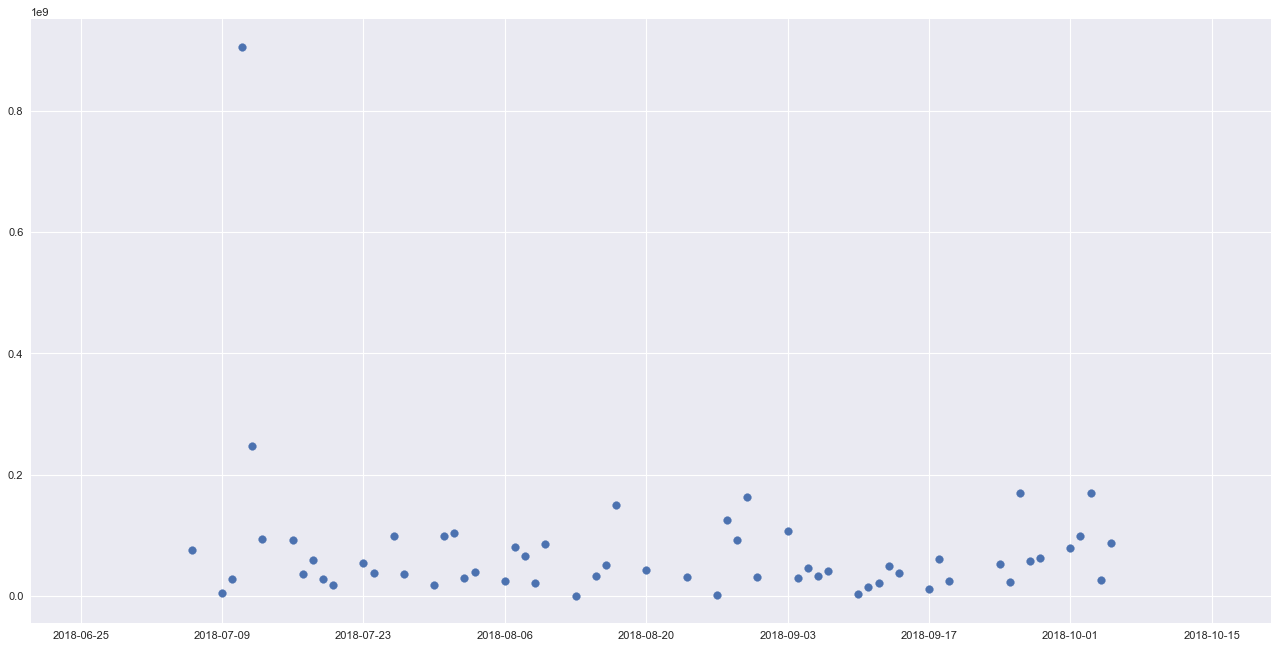

In [12]:
daily_totals = data.groupby(['Date'])['Amount'].sum()# Find total amount donated per-day
daily_counts = data.groupby(['Date'])['Amount'].count()# Find number of donations per-day
dates = data.Date.unique()
fig = plt.figure(figsize=(20,10), dpi=80)
sns.set()
plt.scatter(dates, daily_totals)
# Plot of how daily totals change with date

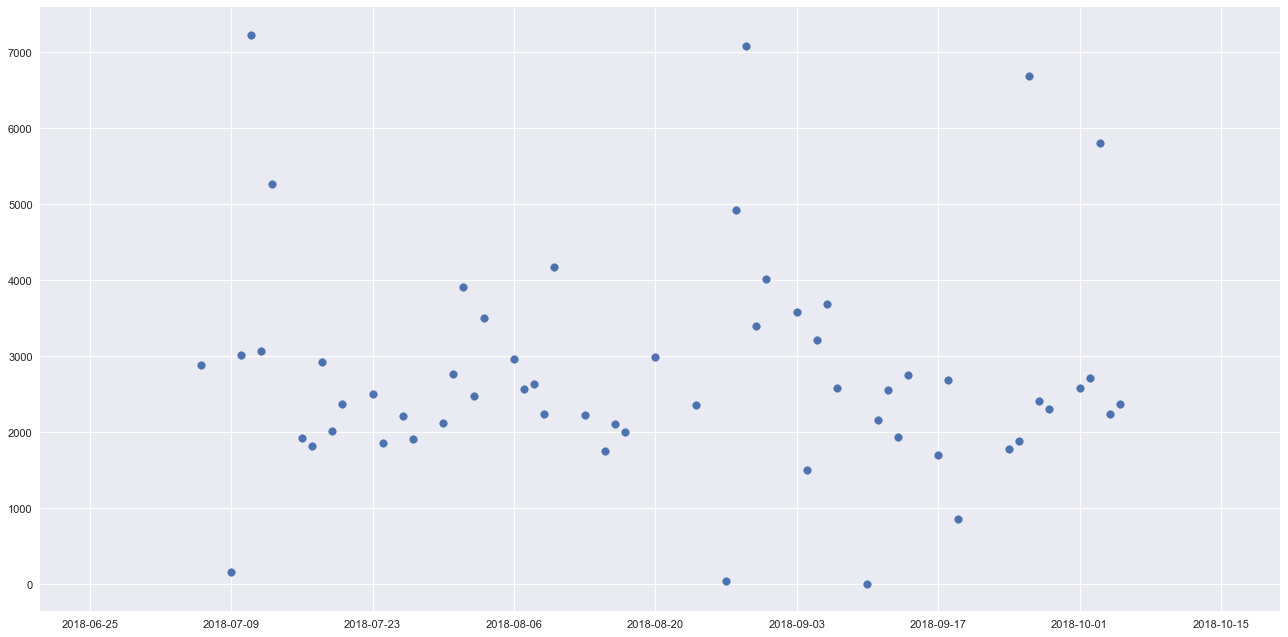

In [13]:
fig = plt.figure(figsize=(20,10), dpi=80)
plt.scatter(dates, daily_counts)
# Plot of how daily counts change with date

### Subpart 3: Finding Weekly Patterns (15 marks)
We need to know if there is any meaningful pattern to be found by adding a Day column into the dataframe, and then visualizing to see if the day of the week matters.

In [14]:
# Write a heuristic to add the Day column using the Date values
import calendar
mydates = list(data['Date'])
days = []
for i in range(len(mydates)):
    days.append(calendar.day_name[mydates[i].weekday()])
    
data['Day']=days

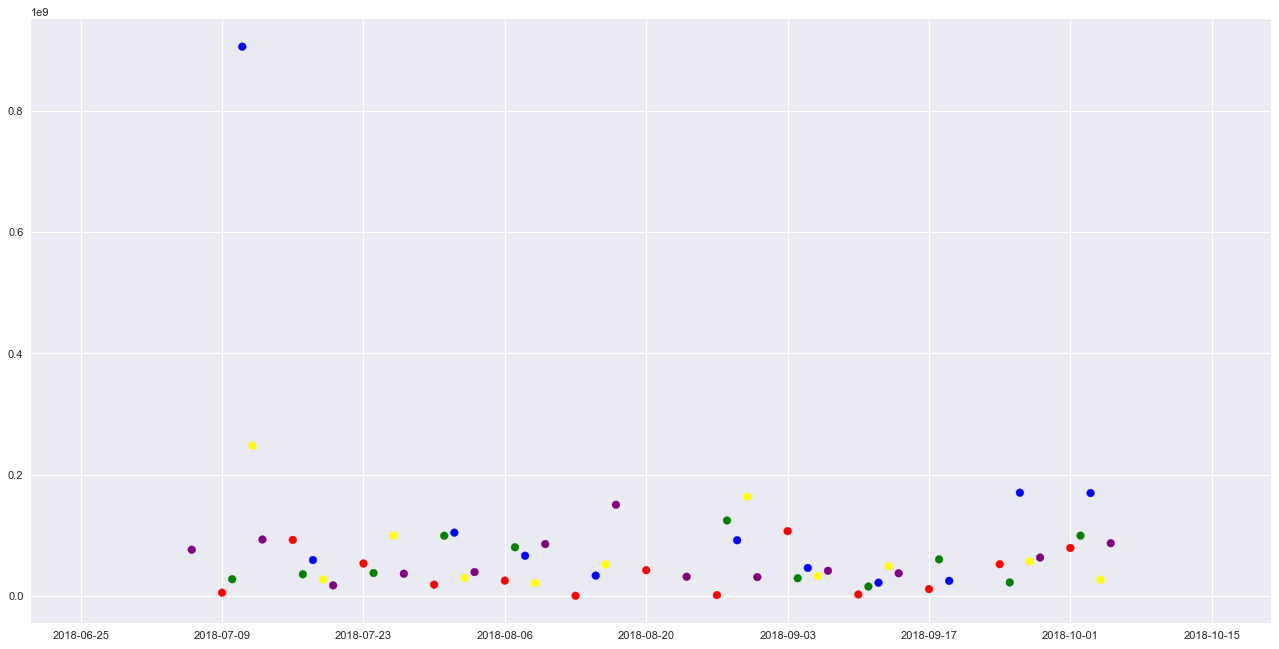

In [35]:
# Plot a graph using either "hue" or "size", or any other parameter to 
# emphasise the Day along with the Date and Daily_Totals
# Go to the documentation to see how this is done
fig = plt.figure(figsize=(20,10), dpi=80)
myday = data.Day.unique()
header=['Date']
df=pd.DataFrame(dates,columns=header)
mydate = list(df['Date'])
days2 = []
for i in range(len(mydate)):
    days2.append(calendar.day_name[mydate[i].weekday()])    

df['Day']=days2
colors = {'Monday':'red', 'Wednesday':'blue', 'Tuesday':'green', 'Friday':'purple', 'Thursday':'yellow'}
sns.set()
plt.scatter(dates, daily_totals, c=df['Day'].apply(lambda x: colors[x]))

### Subpart 4: Finding Correlations (15 marks)

Now that we have roughly visualized how the data is spread over a daily basis and a weekly basis, we now wanted to know if there is any correlation between Day of the week and Amount, or between Time of the month and Amount (i.e. whether the 1st of the month is more likely to have higher donations than, say, the 20th of the month). If you want to find the correlation between an output, or a dependent variable, and a set of independent variables, or inputs, then you need to run some sort of a regression. In our case, since the output is a continuous variable (Amount), we want to run a linear regression. While we will not be using regression to make any predictions in this part, it is still one of the best ways to find the correlation between the input and the output.

Before we move in, think about this: would you want to check whether the correlation between exact date of the month (1st vs 2nd vs 3rd), or would you want to roughly set boundaries as the start of the month (1st - 10th), mid (11th - 20th), and end (20th - 31st). What do you think would give a higher correlation? Which gives more meaningful information?

We'll be using the [sklearn library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) to run the regression and find the R-squared score.

#### Preprocessing variables
Linear Regression can not be done with categorical variables. So how do you run a regression with them? There are many methods to preprocess the categorical variables in a way that they become numerical. The basic principle behind all of them is to assign some number to them. The exact methods will be left to your discovery, but some links are provided below.

[scikit-learn preprocessing module](http://scikit-learn.org/stable/modules/preprocessing.html), particularly section 4.3.4, gives insight on how they have in-built libraries to deal with categorical variables.

[scikit-learn OneHotEncoder](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

[scikit-learn OrdinalEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)

In this case, particularly for the Time_of_month variable, it might just be easier to make your own method to convert the Datetime object (which is a categorical variable) into a numeric. Especially considering that we'll be checking correlations between the amount donated and the time of month.

**Important:** For any method you choose, make sure you have sound reasoning for why you chose that particular way to convert a categorical variable into a numeric. Research!

In [16]:
from sklearn.linear_model import LinearRegression
import datetime as dt

In [21]:
# Write code here to extract a Time_of_month numeric variable from the DateTime object #
df['Date']= df.Date.apply(str)
lst = list(df['Date'])
all_dates=[]

for i in lst:
    x = i[8:10]
    x=int(x)
    all_dates.append(x)
al=pd.DataFrame(all_dates)
y = daily_totals
X = al
reg_TimeOfMonth = LinearRegression()
reg_TimeOfMonth.fit(X,y)

print(reg_TimeOfMonth.score(X, y))

0.002041681069247847


In [22]:
# Write code here to convert the Day variable, defined in Part 3, into a numeric #
df['Day_En'] = df['Day'].map( {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5}) #converted to ordinal variable
X = np.array(df['Day_En']).reshape(-1, 1)
y = daily_totals

reg_Day = LinearRegression()
reg_Day.fit(X,y)

print(reg_Day.score(X, y))

0.005641836130254374


### Subjective Question (Bonus 10 marks)
Would running a Multiple Linear Regression using both X variables, instead of a seperate regressions on Day_of_week and Time_of_month, provide us with the correct conclusions? What information would that give us?

Answer: Multiple linear regression gives a better score if both the independent variables are inter-related, otherwise it leads to overfitting which gives wrong results. Day and date of month are highly correlated but their relation with the dependant varible is not linear as given by their individual regression values and and shown in the graphs above. Possible explaination is the existent of large outliers. Hence, the basic necessity for multiple regression is not met so multiple regression will not be of much use.